In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd

In [5]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func


In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
#display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
second_row = session.query(Station).first()
first_row.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c0490569e8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [15]:
engine.execute('SELECT * from measurement limit 12').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0)]

# Exploratory Climate Analysis

In [16]:
#latest date
session.query( Measurement.date).\
    filter(Measurement.date).\
    order_by(Measurement.date.desc()).first()

('2017-08-23')

In [17]:
# Calculate the date 1 year ago from the last data point in the database
year_before = dt.date(2018, 8, 23) - dt.timedelta(weeks=52)
print("The date one year prior to the last data point was:", year_before)


The date one year prior to the last data point was: 2017-08-24


In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
year_prcp_data = session.query(Measurement.date, Measurement.prcp) \
.filter(Measurement.date > year_before).\
    group_by(Measurement.date) \
.order_by(Measurement.date.desc()) \
.all()
year_prcp_data


[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [23]:
#12 months before latest date using time delta
year_before = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
print(year_before)

2016-08-24


In [26]:
# Save the query results as a Pandas DataFrame and set the index to the date column and sort by date
precipitation_df= pd.DataFrame(year_prcp_data, columns=['date', 'precipitation'])
precipitation_df.set_index('date', inplace=True)
precipitation_df.sort_values(by='date', ascending=False)
precipitation_df.reset_index()

,date,precipitation
0,2017-08-23,0.00
1,2017-08-22,0.00
2,2017-08-21,0.00
3,2017-08-20,0.00
4,2017-08-19,0.00
5,2017-08-18,0.00
6,2017-08-17,0.00
7,2017-08-16,0.00
8,2017-08-15,0.02
9,2017-08-14,0.00


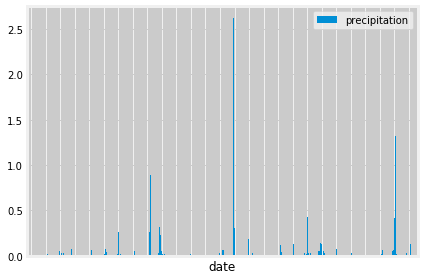

In [33]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot.bar()
plt.tick_params(
    axis = 'x',
    which = 'both',
    bottom = False,
    labelbottom = False)
plt.tight_layout()


![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

![describe](Images/describe.png)

In [24]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00518838').all()
most_active


[('USC00518838', 58.0, 83.0, 72.72407045009784)]

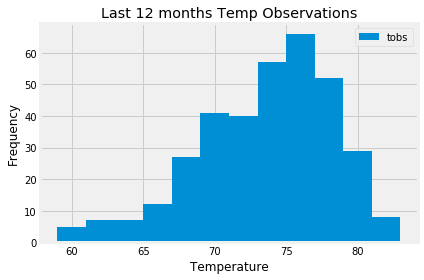

In [29]:
# Choose the station with the highest number of temperature observations.
year_before = dt.date(2017, 8, 23) - dt.timedelta(weeks=52)
prior_year_results = session.query(Measurement.tobs).\
    filter(Measurement.station =='USC00519281' ).\
    filter(Measurement.date >= year_before).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
pyr_df = pd.DataFrame(prior_year_results, columns=['tobs'])
pyr_df.plot.hist(bins=12)
plt.title('Last 12 months Temp Observations'),
plt.xlabel('Temperature'),
plt.tight_layout()

![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
